Fruits And Vegetable Classification using Convolutional Neural Network

Import Libraries

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt2

Data Preprocessing

Training Image Preprocessing and
Validation Image Preprocessing
: model training purpose

:test set is evaluation purpose



In [11]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)


Found 3115 files belonging to 36 classes.


In [12]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 351 files belonging to 36 classes.


Building **Model**

Saving Model

In [30]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)


Found 357 files belonging to 36 classes.


1/1 [==============================] - 0s 427ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.67      0.80         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      1.00      0.95         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.89      0.94         9
  cauliflower       0.91      1.00      0.95        10
chilli pepper       1.00      0.89      0.94         9
         corn       0.80      0.80      0.80        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.83      1.00      0.91        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       0.90      1.00      0.95         9
     jalepeno       1.00      1.00      1.

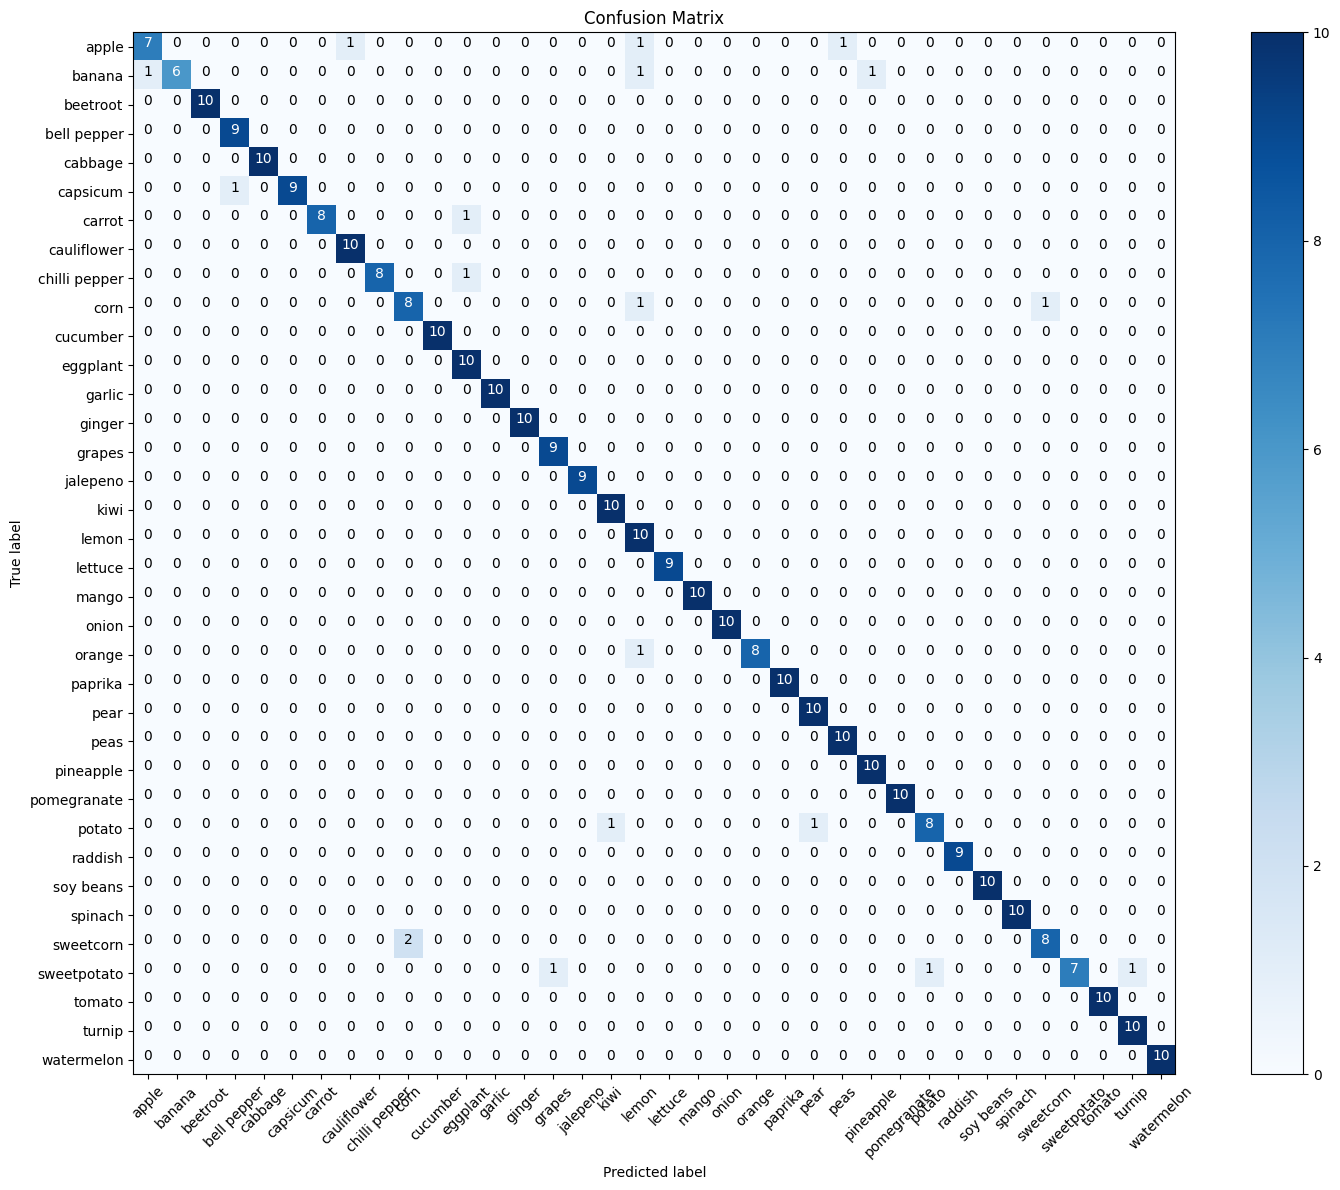

In [44]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ... your previous code ...

# Load the saved model
loaded_model = tf.keras.models.load_model('VStrained_model.h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = validation_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(confusion, class_names)
plt.show()


In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your trained CNN model (cnn) and datasets (training_set, validation_set, test_set)

def get_true_labels_and_predictions(model, dataset):
    true_labels = []
    predicted_labels = []
    for images, labels in dataset:
        true_labels.extend(np.argmax(labels.numpy(), axis=1))
        predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    return true_labels, predicted_labels

# Calculate metrics for the training dataset
train_true_labels, train_pred_labels = get_true_labels_and_predictions(cnn, training_set)
train_cm = confusion_matrix(train_true_labels, train_pred_labels)
train_report = classification_report(train_true_labels, train_pred_labels)

# Calculate metrics for the validation dataset
val_true_labels, val_pred_labels = get_true_labels_and_predictions(cnn, validation_set)
val_cm = confusion_matrix(val_true_labels, val_pred_labels)
val_report = classification_report(val_true_labels, val_pred_labels)

# Calculate metrics for the test dataset
test_true_labels, test_pred_labels = get_true_labels_and_predictions(cnn, test_set)
test_cm = confusion_matrix(test_true_labels, test_pred_labels)
test_report = classification_report(test_true_labels, test_pred_labels)

# Print or use the metrics as needed
print("Train Confusion Matrix:")
print(train_cm)
print("Train Classification Report:")
print(train_report)

print("\nValidation Confusion Matrix:")
print(val_cm)
print("Validation Classification Report:")
print(val_report)

print("\nTest Confusion Matrix:")
print(test_cm)
print("Test Classification Report:")
print(test_report)


1/1 [==============================] - 0s 108ms/step
Train Confusion Matrix:
[[68  0  0 ...  0  0  0]
 [ 1 71  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  0  0]
 [ 0  0  0 ...  0 96  0]
 [ 0  0  0 ...  0  0 83]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.95      0.97        75
           2       1.00      1.00      1.00        88
           3       0.97      0.98      0.97        90
           4       1.00      0.96      0.98        92
           5       0.97      0.97      0.97        89
           6       0.98      0.98      0.98        82
           7       1.00      0.97      0.99        79
           8       0.99      0.97      0.98        87
           9       0.92      0.90      0.91        87
          10       0.99      0.99      0.99        94
          11       1.00      1.00      1.00        84
          12       1.00      0.93  

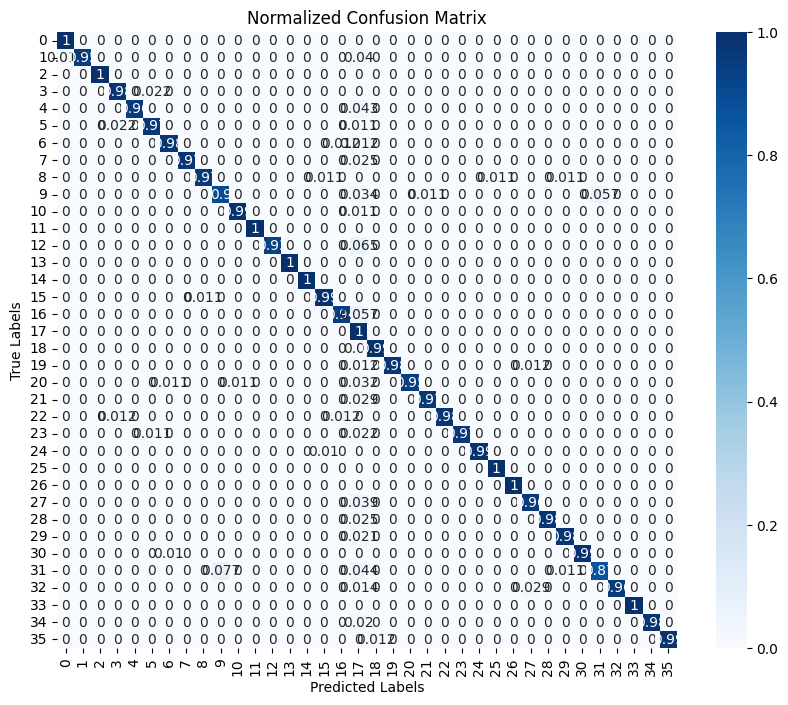

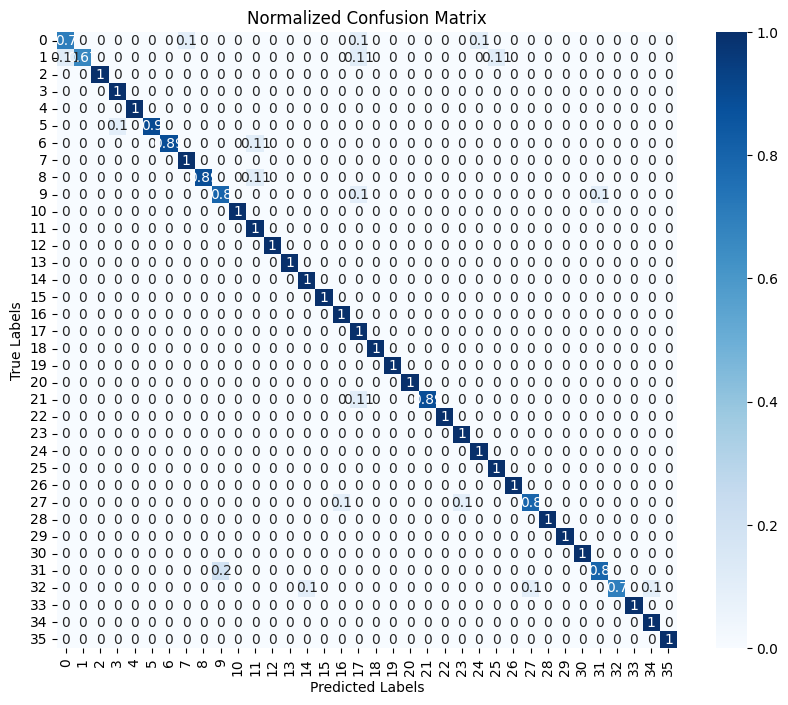

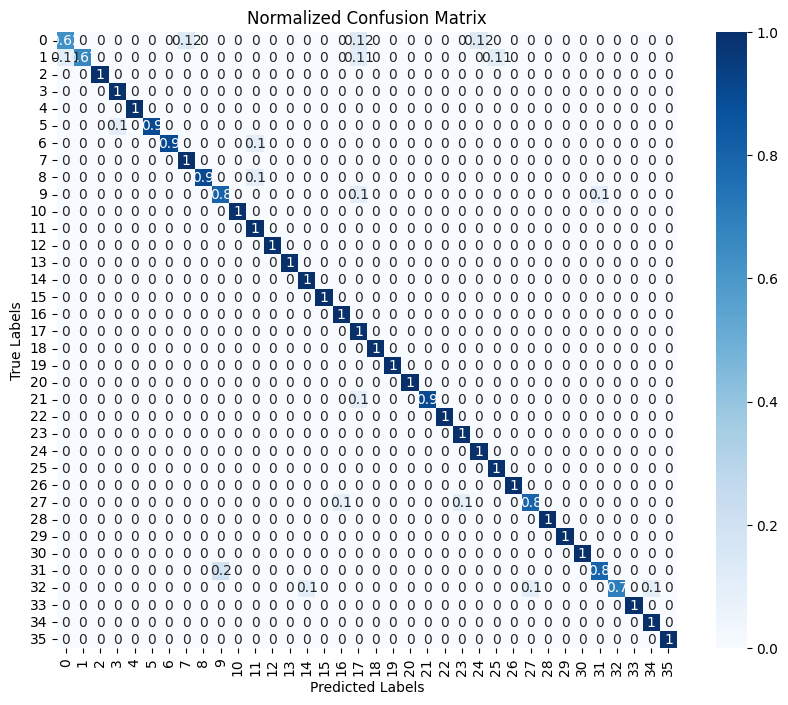

In [47]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code for loading datasets and defining the CNN model) ...

def normalize_confusion_matrix(cm):
    # Normalize each row of the confusion matrix to sum up to 1
    row_sums = cm.sum(axis=1)
    normalized_cm = cm / row_sums[:, np.newaxis]
    return normalized_cm

# ... (your existing code for getting true labels and predictions and calculating metrics) ...

# Normalize confusion matrices
train_cm_normalized = normalize_confusion_matrix(train_cm)
val_cm_normalized = normalize_confusion_matrix(val_cm)
test_cm_normalized = normalize_confusion_matrix(test_cm)

# Function to plot the normalized confusion matrix
def plot_normalized_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get class names
class_names = sorted(set(train_true_labels + val_true_labels + test_true_labels))

# Plot normalized confusion matrices for all datasets
plot_normalized_confusion_matrix(train_cm_normalized, class_names)
plot_normalized_confusion_matrix(val_cm_normalized, class_names)
plot_normalized_confusion_matrix(test_cm_normalized, class_names)


1/1 [==============================] - 0s 330ms/step


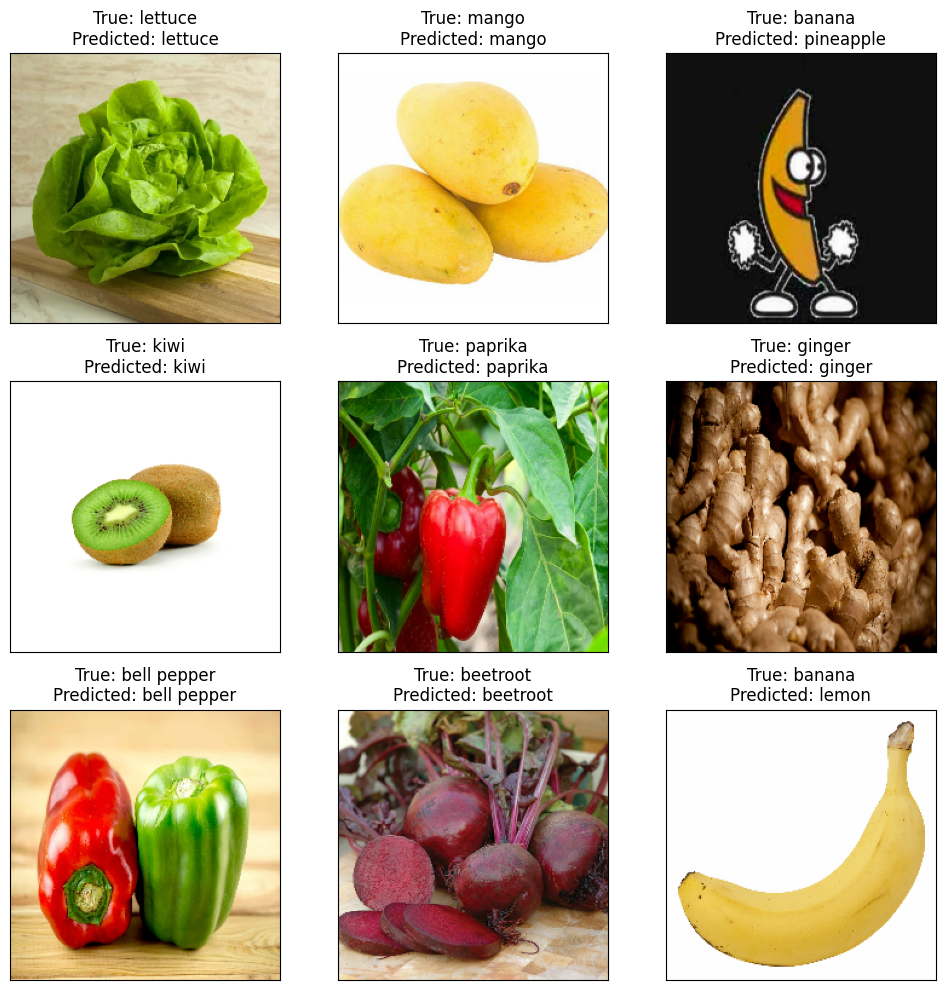

In [48]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()



In [91]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Load your pre-trained CNN model
model_path = 'VStrained_model.h5'  # Replace with the path to your trained model file

try:
    model = load_model(model_path)
except Exception as e:
    print(f"Error loading the model: {str(e)}")
    exit()

# Define a function to preprocess the user's input image
def preprocess_image(image_path, target_size):
    try:
        img = image.load_img(image_path, target_size=target_size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.0  # Normalize the image data
        return img
    except Exception as e:
        print(f"Error preprocessing the image: {str(e)}")
        exit()

# Define a function to make predictions
def predict_image(input_image, model, class_labels):
    try:
        # Make predictions
        predictions = model.predict(input_image)
        predicted_class_index = np.argmax(predictions)
        predicted_class = class_labels[predicted_class_index]
        return predicted_class
    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        exit()

# User input image path (replace with the path to the user's input image)
user_input_image_path = 'C:\Capstone\Image_1.jpg'

# Assuming you have a list of class labels
  # Replace with your class labels

# Get predictions for the user input image
input_image = preprocess_image(user_input_image_path, target_size=(224, 224))  # Adjust the target size if needed
predicted_class = predict_image(input_image, model, class_labels)

print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 266ms/step
Predicted class: cauliflower
